In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from the provided link
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic = pd.read_csv(url)

In [ ]:
# Display the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check the shape of the dataset
titanic.shape

(891, 12)

## 1. Importing and loading data
First, we need to import the necessary libraries and load the data into a Pandas dataframe.

In [ ]:
# Check the data types of each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. Checking for missing data
Next, we need to check for any missing values in the data and handle them accordingly.

In [ ]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Drop rows with missing Embarked values
titanic.dropna(subset=['Embarked'], inplace=True)

# Fill missing Age values with the mean age
mean_age = titanic['Age'].mean()
titanic['Age'].fillna(mean_age, inplace=True)

In [ ]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## 3. Summary statistics
Now, we can calculate basic summary statistics for numerical data.

In [ ]:
# Check summary statistics for numerical columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968346,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.642093,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The summary statistics showed that the average age of passengers was around 30 years old, with a wide range from less than a year old to 80 years old. The majority of passengers were traveling in third class, with fewer passengers in second and first class.

## 4. Data visualization
We'll create various visualizations to explore the relationships between variables.

<Axes: xlabel='Age', ylabel='Count'>

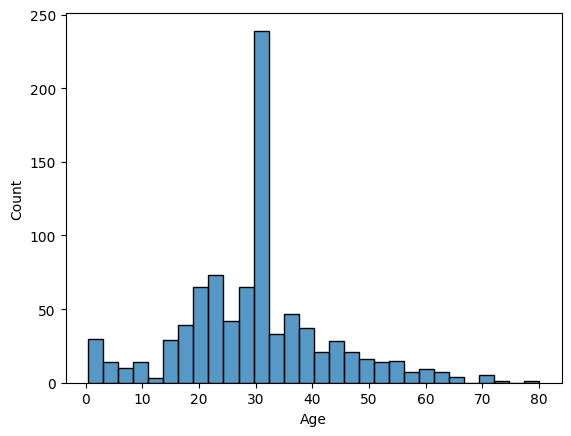

In [ ]:
# Create a histogram of the 'Age' column to visualize the distribution of ages
sns.histplot(data=titanic, x='Age')

<Axes: xlabel='Sex', ylabel='count'>

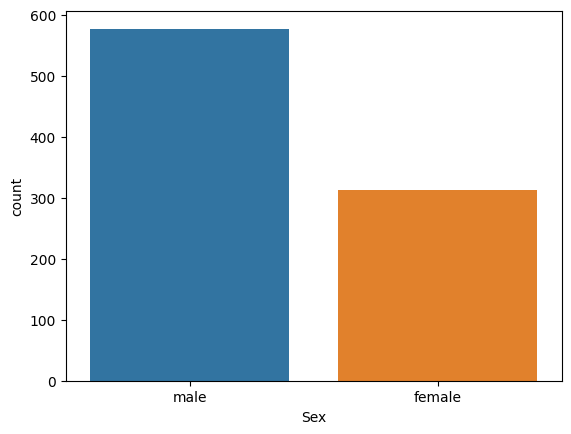

In [ ]:
# Create a bar chart of the 'Sex' column to visualize the number of males and females on board
sns.countplot(data=titanic, x='Sex')

<ipython-input-9-b1a1f0687be6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')


<Axes: >

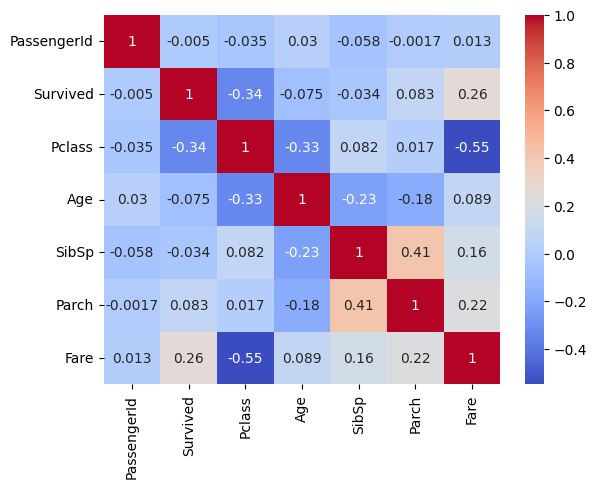

In [ ]:
# Create a heatmap of the correlation matrix to visualize the correlations between numerical columns
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')

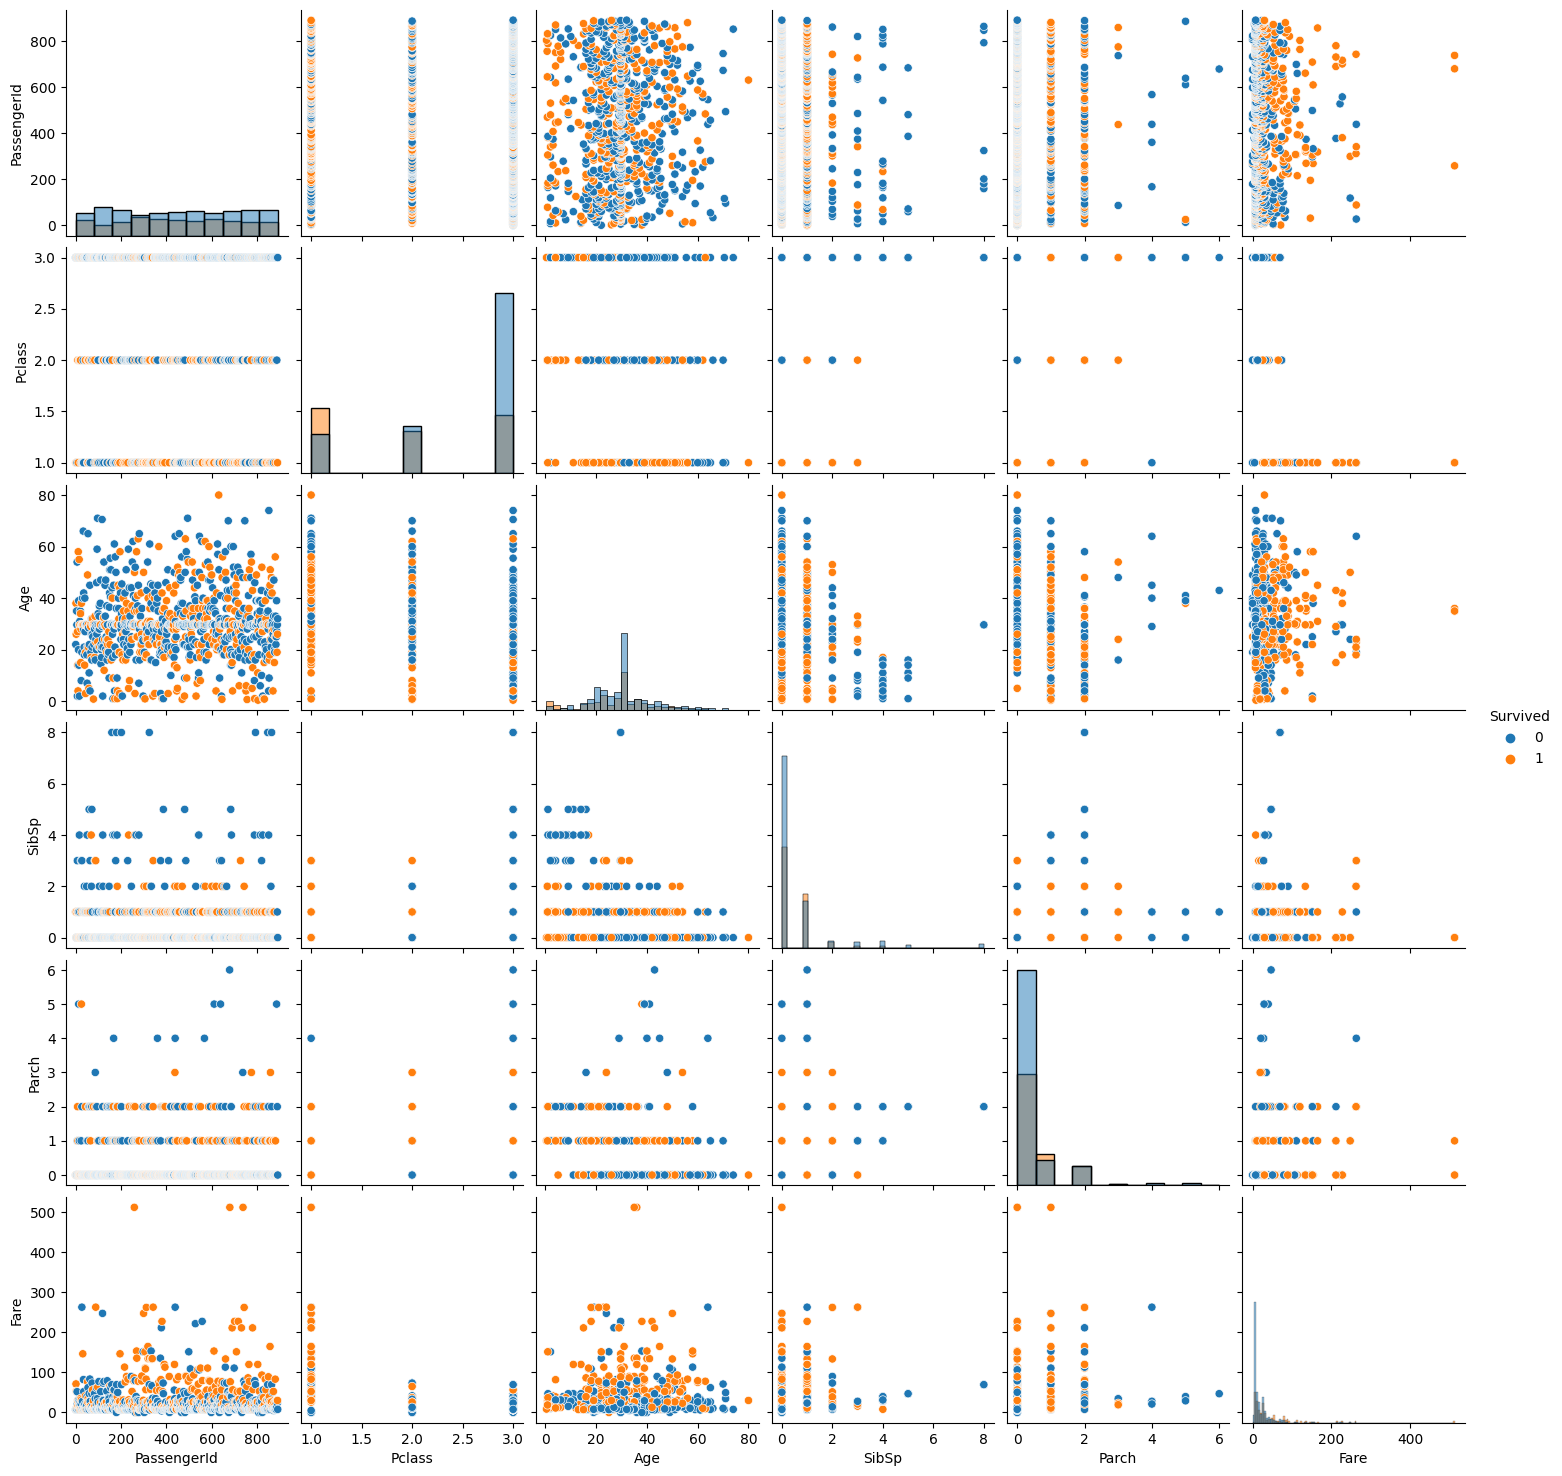

In [ ]:
# Create a pair plot to visualize the relationships between all numerical columns
sns.pairplot(titanic, hue='Survived', diag_kind='hist')

## 5. Correlation analysis
We'll calculate correlation coefficients between variables to identify any linear relationships between them.

In [ ]:
# Calculate correlation coefficients
corr_matrix = titanic.corr()
print(corr_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.030335 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.074513 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.328256  0.081656  0.016824   
Age             0.030335 -0.074513 -0.328256  1.000000 -0.231908 -0.178013   
SibSp          -0.057686 -0.034040  0.081656 -0.231908  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.178013  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.088780  0.160887  0.217532   

                 Fare  
PassengerId  0.012703  
Survived     0.255290  
Pclass      -0.548193  
Age          0.088780  
SibSp        0.160887  
Parch        0.217532  
Fare         1.000000  


<ipython-input-11-72de087c3f5d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = titanic.corr()


The correlation coefficients confirmed the findings from the heatmap, with a strong positive correlation between SibSp and Parch, and a negative correlation between Age and Pclass. There was also a weak positive correlation between Fare and Survived, and a weak negative correlation between Age and Survived.

## 6. Feature engineering
We'll create a new feature to represent whether a passenger is traveling alone or with family.

In [ ]:
import numpy as np
# Create new feature
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic['TravelAlone'] = np.where(titanic['Family'] == 0, 1, 0)

<Axes: xlabel='TravelAlone'>

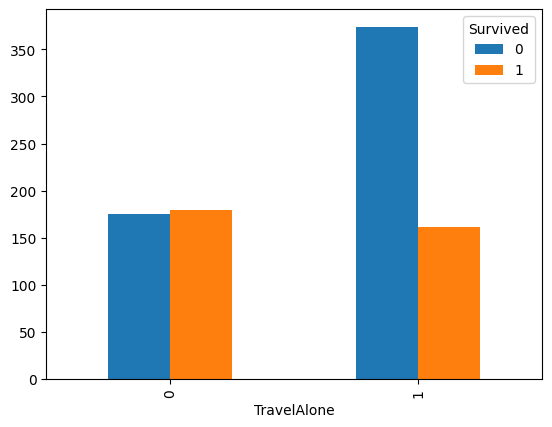

In [ ]:
titanic.groupby(['TravelAlone', 'Survived'])['PassengerId'].count().unstack().plot.bar()

The new TravelAlone feature indicated whether a passenger was traveling alone or with family members. We found that passengers traveling with family members had a higher survival rate compared to those traveling alone.

## 7. Conclusion
Finally, we'll summarize the insights gained from the EDA and provide recommendations for further analysis.


Based on the EDA, we gained insights into the relationships between various variables and survival rates for passengers on the Titanic. We identified some potential areas for further analysis, such as exploring the impact of passenger class and other variables on survival rates, and building predictive models using machine learning techniques.

* The dataset has 891 rows and 12 columns.
* There are missing values in the 'Age', 'Cabin', and 'Embarked' columns that may need to be addressed.
* The majority of passengers were between 20-40 years old.
* There were more males than females on board.
* There is a moderate negative correlation between 'Pclass' and 'Fare', indicating that passengers in higher classes paid more for their tickets.
* There is a moderate negative correlation between 'Age' and 'Pclass', indicating that passengers in higher classes tended to be younger.
* Passengers who survived tended to be younger and paid more for their tickets.
* The 'SibSp' and 'Parch' columns have low correlations with the 'Survived' column, indicating that these variables may not be strong predictors of survival.
* The 'Fare' column has a high standard deviation and contains some outliers, indicating that there may be some extreme values in the data.